# Import

In [429]:
# Python
import numpy as np
import pandas as pd
import time
from IPython.display import Image

# Machine Learning
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# RDKit
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem.rdMolDescriptors import GetHashedMorganFingerprint
from rdkit.Chem.Draw import rdMolDraw2D

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [430]:
def convert_number_to_group(number, group_interval, start_num):
    """Converts a number to a group based on the given group interval.

    Args:
    number: The number to convert.
    group_interval: The group interval.

    Returns:
    The group number.
    """
    number = number-start_num
    group_number = (number - group_interval // 2) // group_interval + 1
    return int(group_number)

In [431]:
# Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sn
import time

# Machine Learning
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
#import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

def DT(x_train, y_train):
    # Define the parameter grid for RandomizedSearchCV
    param_dist = {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    # Create a RandomizedSearchCV object
    dt = DecisionTreeRegressor(random_state=42)
    
    # Fit the RandomizedSearchCV object
    dt.fit(x_train, y_train)
    
    ## Get the best model
    #best_model = random_search.best_estimator_
    #print(random_search.best_params_)
    
    return dt

# Regression to Classification

In [432]:
#thereshold = 1.96 # 95%]
import itertools
interval   = [30]
start_temp = [100]

all_combinations = []
list1_permutations = itertools.permutations(interval, len(start_temp))

In [433]:
for each_permutation in list1_permutations:
    zipped = zip(each_permutation, start_temp)
    all_combinations.append(list(zipped))

print(all_combinations)

[[(30, 100)]]


In [434]:
interval_list = []
start_temp_list = []
F1_1_list = []
F1_2_list = []
F1_3_list = []
F1_4_list = []

In [435]:
#thereshold = 1.96 # 95%]
import itertools
interval   = 50
start_temp = 100
(interval, start_temp)

(50, 100)

## 560 point: 5 Feature

In [436]:
df = pd.read_excel("../../DataTb.xlsx", sheet_name="AllDataSet")

In [437]:
df.head()

,CAS,Name,Type,SMILES,Formular,Tb,C,Double,Triple,Bracket,Cyclic,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,74-82-8,methane,alkane,C,CH4,111.65,1,0,0,0,0,10000,NaN,NaN,NaN
1,74-84-0,ethane,alkane,CC,C2H6,184.55,2,0,0,0,0,20000,NaN,NaN,NaN
2,74-98-6,propane,alkane,CCC,C3H8,231.05,3,0,0,0,0,30000,NaN,NaN,NaN
3,75-19-4,Cyclopropane,alkane,C1CC1,C3H6,240.35,3,0,0,0,1,30001,NaN,NaN,y = 129.09x0.5371
4,75-28-5,2-Methylpropane,alkane,CC(C)C,C4H10,261.45,4,0,0,1,0,40010,NaN,NaN,R² = 0.956


In [438]:
df2 = df.copy()
df2["group"] =df["Tb"].apply(convert_number_to_group, args=[interval     # interval
                                                           , start_temp  # Start_num
                                                          ])

data_x = df[["C", "Double", "Triple", "Bracket", "Cyclic"]]
data_y = df2["group"]
#data_y
#data_x

x_train_fp, x_test_fp, y_train_fp, y_test_fp = train_test_split(data_x, data_y,
                                                                test_size=0.20,
                                                                random_state=42)
dt = DecisionTreeClassifier(random_state=42)
# Fit the RandomizedSearchCV object
dt.fit(x_train_fp, y_train_fp)

DecisionTreeClassifier(random_state=42)

0.8839285714285714


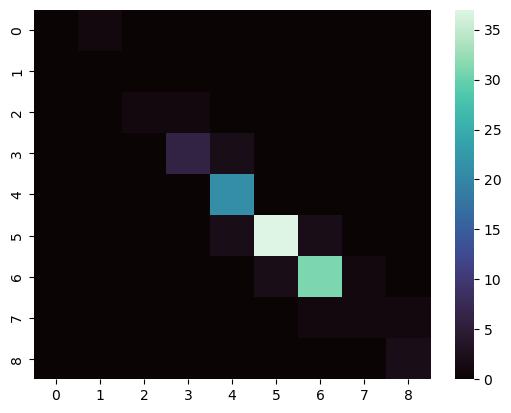

In [439]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score

y_pred_test = dt.predict(x_test_fp)
cm3 = confusion_matrix(y_test_fp, y_pred_test)
sns.heatmap(cm3, cmap=sns.color_palette("mako", as_cmap=True))#, linecolor="white", linewidth=2)
F1_1 = f1_score(y_test_fp, y_pred_test, average="micro")
print(F1_1)
           #,vmin=5.0,vmax=0)
            #, annot = True)

0.9214285714285714


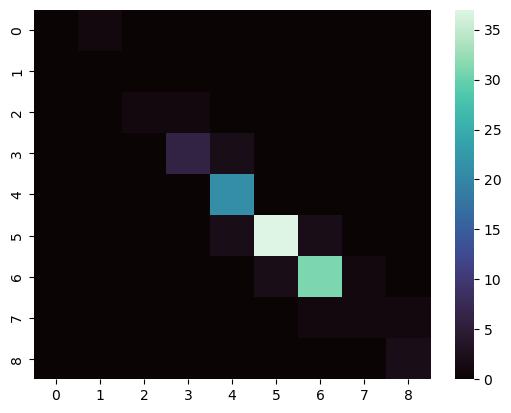

In [440]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score

y_pred = dt.predict(data_x)
cm4 = confusion_matrix(y_test_fp, y_pred_test)
sns.heatmap(cm4, cmap=sns.color_palette("mako", as_cmap=True))#, linecolor="white", linewidth=2)
F1_2 = f1_score(data_y, y_pred, average="micro")
print(F1_2)
           #,vmin=5.0,vmax=0)
            #, annot = True)

In [441]:
df2["predict"]= y_pred
df2[["group", "predict"]]

,group,predict
0,0,0
1,2,2
2,3,3
3,3,3
4,3,3
...,...,...
555,7,7
556,7,7
557,8,7
558,8,8


## 560 point: C-MF 1024 bit

In [442]:
 # %% 
from rdkit import DataStructs
# Import Data
df = pd.read_excel("../../Data.xlsx",sheet_name="560point")

# Select feature for data: X=SMILE, Y=Tb
X_data_excel= df[["SMILES"]]
Y_data= df["Tb"].apply(convert_number_to_group, args=[interval     # interval
                                                    , start_temp  # Start_num
                                                          ])

X_data_use = X_data_excel.copy()
X_data_use["molecule"] = X_data_use["SMILES"].apply(lambda x: Chem.MolFromSmiles(x))
X_data_use["count_morgan_fp"] = X_data_use["molecule"].apply(lambda x: rdMolDescriptors.GetHashedMorganFingerprint(
            x, 
            radius=3, 
            nBits=1024,
            useFeatures=True, useChirality=True))

 # Transfrom Fingerprint to Column in DataFrame
X_data_fp = []
for i in range(X_data_use.shape[0]):
    #print(np.array(X_data_use["morgan_fp"][i]))
    blank_arr = np.zeros((0,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(X_data_use["count_morgan_fp"][i],blank_arr)
    datafram_i = pd.DataFrame(blank_arr)
    datafram_i = datafram_i.T
    X_data_fp.append(datafram_i)
x_data_fp = pd.concat(X_data_fp, ignore_index=True)

y_data_fp = Y_data.copy()

In [443]:
x_train_fp, x_test_fp, y_train_fp, y_test_fp = train_test_split(x_data_fp, y_data_fp,
                                                                test_size=0.20,
                                                                random_state=42)
dt = DecisionTreeClassifier(random_state=42)
# Fit the RandomizedSearchCV object
dt.fit(x_train_fp, y_train_fp)

DecisionTreeClassifier(random_state=42)

In [444]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score

y_pred_test = dt.predict(x_test_fp)
cm1 = confusion_matrix(y_test_fp, y_pred_test)

F1_3 = f1_score(y_test_fp, y_pred_test, average="micro")
print(F1_3)
g1

0.8214285714285714


<Axes: >

In [445]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score

y_pred = dt.predict(x_data_fp)
cm2 = confusion_matrix(y_data_fp, y_pred)

F1_4 = f1_score(y_data_fp, y_pred, average="micro")
print(F1_4)
g2

0.9642857142857143


<Axes: >

## Visual F1-score

C:\Users\acer\AppData\Local\Temp\ipykernel_5772\3998883015.py:5: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.get_shared_y_axes().join(ax2)


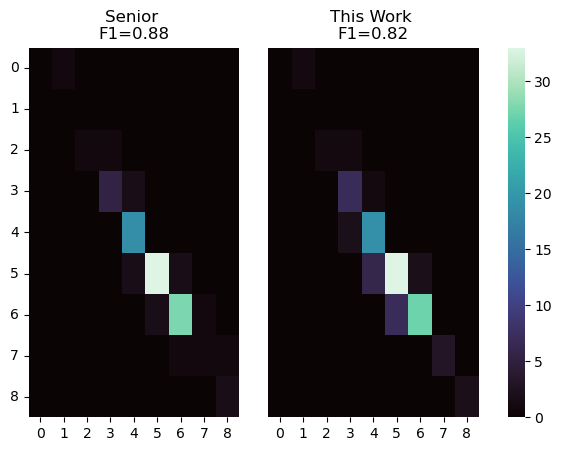

In [455]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score
f,(ax1,ax2, axcb) = plt.subplots(1,3, 
            gridspec_kw={'width_ratios':[1,1,0.08]})
ax1.get_shared_y_axes().join(ax2)
g1 = sns.heatmap(cm3, cmap=sns.color_palette("mako", as_cmap=True), ax=ax1,cbar=False)#, linecolor="white", linewidth=2)
g2 = sns.heatmap(cm1, cmap=sns.color_palette("mako", as_cmap=True), ax=ax2,cbar_ax=axcb)#, linecolor="white", linewidth=2)
g1.set_title(f'Senior \nF1={round(F1_1,2)}')
g1.set_ylabel('')
g1.set_xlabel('')
g2.set_title(f'This Work \nF1={round(F1_3,2)}')
g2.set_ylabel('')
g2.set_xlabel('')
g2.set_yticks([])
for ax in [g1,g2]:
    tl = ax.get_xticklabels()
   # ax.set_xticklabels(tl, rotation=90)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)

plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_5772\2416201387.py:3: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.get_shared_y_axes().join(ax2)


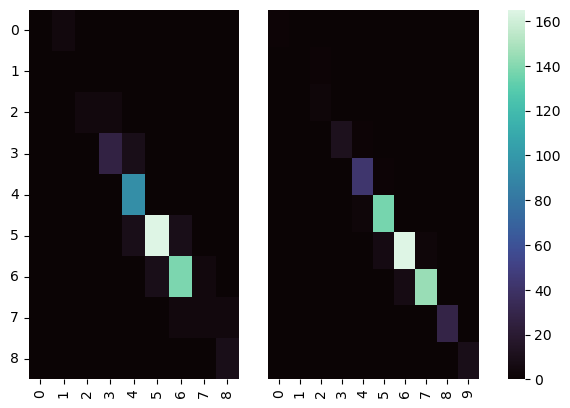

In [447]:
f,(ax1,ax2, axcb) = plt.subplots(1,3, 
            gridspec_kw={'width_ratios':[1,1,0.08]})
ax1.get_shared_y_axes().join(ax2)
g1 = sns.heatmap(cm4, cmap=sns.color_palette("mako", as_cmap=True), ax=ax1,cbar=False)#, linecolor="white", linewidth=2)
g2 = sns.heatmap(cm2, cmap=sns.color_palette("mako", as_cmap=True), ax=ax2,cbar_ax=axcb)#, linecolor="white", linewidth=2)
g1.set_ylabel('')
g1.set_xlabel('')
g2.set_ylabel('')
g2.set_xlabel('')
g2.set_yticks([])
for ax in [g1,g2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)

plt.show()

In [394]:
df2["predict"]= y_pred
df2[["group", "predict"]]

,group,predict
0,0,0
1,2,2
2,3,3
3,3,3
4,3,3
...,...,...
555,7,7
556,7,7
557,8,8
558,8,8


In [375]:
interval_list.append(interval)
start_temp_list.append(start_temp)
F1_1_list.append(F1_1)
F1_2_list.append(F1_2)
F1_3_list.append(F1_3)
F1_4_list.append(F1_4)
#df_data = pd.DataFrame(data , columns=["interval","start_temp" ,"F1_1", "F1_2", "F1_3", "F1_4" ])
#df_data

In [322]:
#interval_list 
#start_temp_list 
#F1_1_list 
#F1_2_list 
#F1_3_list 
F1_4_list 

[0.9642857142857143,
 0.9803571428571428,
 0.9500000000000001,
 0.9892857142857143,
 0.9696428571428571,
 0.9500000000000001]

In [329]:
data_append = {"interval"   : interval_list,
               "start_temp" : start_temp_list,
               "F1 Senior_test"       : F1_1_list,
               "F1 Senior_total"       : F1_2_list,
               "F1 Our_test"       : F1_3_list,
               "F1 Our_total"       : F1_4_list}
df_data_append = pd.DataFrame(data_append) #, columns=["interval","start_temp" ,"F1_1", "F1_2", "F1_3", "F1_4" ])
#pd.concat([df_data,df_data_append])
df_data_append

,interval,start_temp,F1 Senior_test,F1 Senior_total,F1 Our_test,F1 Our_total
0,50,100,0.883929,0.921429,0.821429,0.964286
1,100,100,0.919643,0.960714,0.910714,0.980357
2,25,100,0.758929,0.825000,0.758929,0.950000
3,100,75,0.955357,0.966071,0.946429,0.989286
4,50,75,0.883929,0.937500,0.866071,0.969643
5,25,75,0.758929,0.825000,0.758929,0.950000
